In [1]:
import pandas as pd

#reading data
population = pd.read_csv(r"dataset/WorldPopulationGrowth.csv")


In [2]:
population.head() #check the first 5 rows

,Year,Population,Yearly Growth %,Number,Density (Pop/km2)
0,1951,"2,543,130,380",1.75%,"43,808,223",17
1,1952,"2,590,270,899",1.85%,"47,140,519",17
2,1953,"2,640,278,797",1.93%,"50,007,898",18
3,1954,"2,691,979,339",1.96%,"51,700,542",18
4,1955,"2,746,072,141",2.01%,"54,092,802",18


In [3]:
population.shape #check the shape of the data

(73, 5)

In [4]:
population = population[['Year', 'Population']] #filter required columns

In [5]:
population.head() #check the first 5 rows

,Year,Population
0,1951,"2,543,130,380"
1,1952,"2,590,270,899"
2,1953,"2,640,278,797"
3,1954,"2,691,979,339"
4,1955,"2,746,072,141"


In [6]:
population.shape #check shape of the data

(73, 2)

In [7]:
population.describe() # check the mathematical summary of the data

,Year
count,73.000000
mean,1987.000000
std,21.217131
min,1951.000000
25%,1969.000000
50%,1987.000000
75%,2005.000000
max,2023.000000


In [8]:
population.info() #check the summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        73 non-null     int64 
 1   Population  73 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


In [9]:
population['Population'] = population['Population'].astype(str).str.replace(',', '').astype('int64') #convert the data type of the population column to int64

In [10]:
#normalization
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
population['Population'] = min_max_scaler.fit_transform(population[['Population']])

In [11]:
population.info() #check again the summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        73 non-null     int64  
 1   Population  73 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.3 KB


In [12]:
#define features

X = population[['Year']]
Y = population[['Population']]

In [13]:
#splitting the data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=6)


In [14]:
#checking splitted data

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(65, 1)
(8, 1)
(65, 1)
(8, 1)


In [ ]:
print("X_train head \n",X_train.head())
print("X_test head \n",X_test.head())
print("Y_train head \n",y_train.head())
print("Y_test head \n",y_test.head())

In [15]:
# import learning algorithm (linear regression) from sklearn
from sklearn.linear_model import LinearRegression

model = LinearRegression() # create a linear regression model

model.fit(X_train, y_train) # fit the model


y_pred = model.predict(X_test) # predict the test data

print(min_max_scaler.inverse_transform(y_pred)) # check the shape of the predicted data


[[4.80952494e+09]
 [7.10947921e+09]
 [7.03017044e+09]
 [5.28537755e+09]
 [6.55431783e+09]
 [7.34740551e+09]
 [6.63362660e+09]
 [4.57159864e+09]]


In [16]:
import pickle
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model weights saved to 'linear_regression_model.pkl'")    

Model weights saved to 'linear_regression_model.pkl'


In [17]:
#evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error: {rmse}')
print(f'R² Score: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

print(f'intercept: {model.intercept_}')
print(f'coef: {model.coef_}')

Root Mean Squared Error: 0.0136068913018943
R² Score: 0.9954280837498577
Mean Absolute Error: 0.011198252409064267
Mean Squared Error: 0.00018514749090156677
intercept: [-28.17117251]
coef: [[0.01441406]]


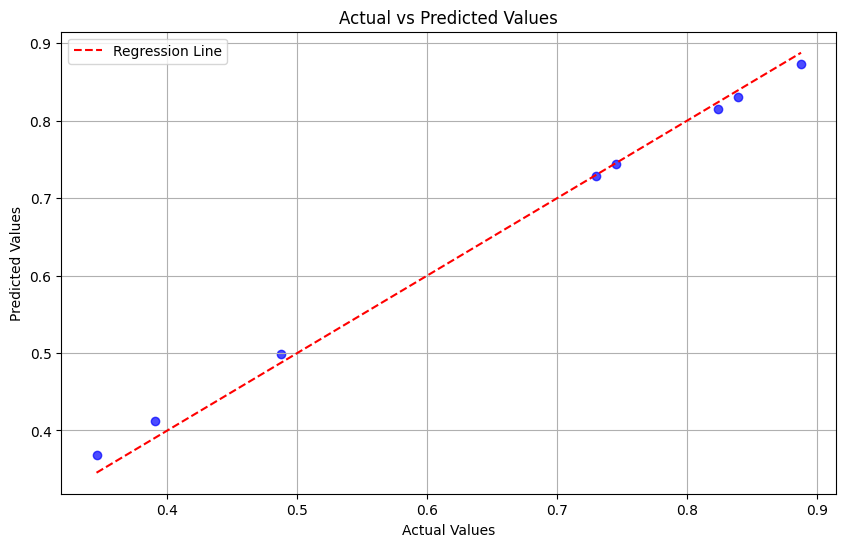

In [18]:
import matplotlib.pyplot as plt

# Create the actual vs predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label = 'Regression Line')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.legend()

# Save the plot
plt.savefig('actual_vs_predicted.png')

# Show the plot
plt.show()

/home/kinar/anaconda3/envs/task/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3603: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


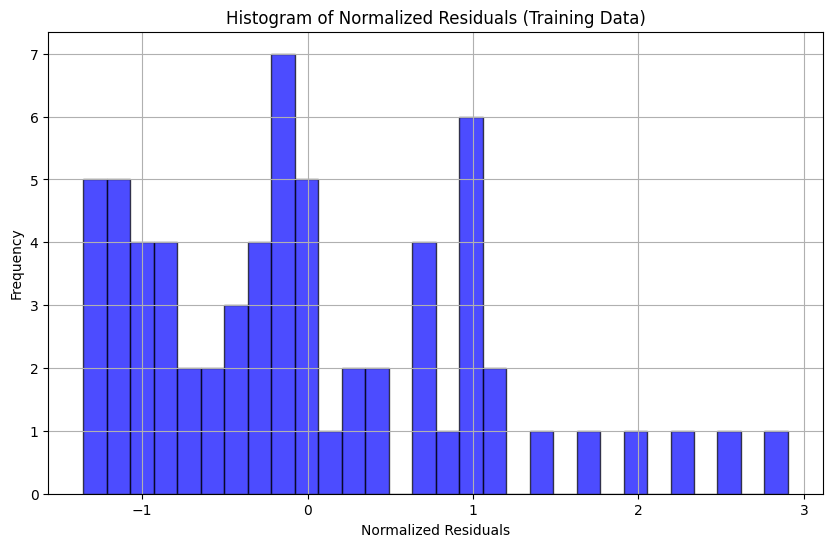

In [19]:

y_train_pred = model.predict(X_train)  # Assuming X_train is defined

# Calculate residuals
train_residuals = y_train - y_train_pred  # y_train is the actual values

# Normalize the residuals
mean_train_residual = np.mean(train_residuals)
std_train_residual = np.std(train_residuals)
normalized_train_residuals = (train_residuals - mean_train_residual) / std_train_residual

# Create a histogram of the normalized residuals
plt.figure(figsize=(10, 6))
plt.hist(normalized_train_residuals, bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel('Normalized Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Normalized Residuals (Training Data)')
plt.grid(True)


# Save the plot
plt.savefig('residuals_histogram.png')

# Show the plot
plt.show()

In [20]:
#to load model again

with open('linear_regression_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [21]:
# New data for prediction
new_data = pd.DataFrame({'Year': [2025]})

# Make predictions using the model
test_prediction = model.predict(new_data)

# Inverse-transform the predicted population values to get the original scale
predicted_population = min_max_scaler.inverse_transform(test_prediction.reshape(-1, 1))

print(predicted_population)


[[8.14049319e+09]]
